In [155]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
import os, sys

In [3]:
root_dir = os.getcwd()
sys.path.append(root_dir)

In [188]:
from orbitals import datatypes, tools, visualisation

## Plotting single electron atomic orbitals.

We can straightforwardly compute the wavefunction for a single electron atomic orbital, such as the 2p orbital, by specifying the quantum numbers `n`, `l`, and `m`.
We can then visualise the desnity associated with this wavefunction in 3D. We have two simple functions to do this, one which will plot the individual points (of the grid on which the wavefunction is evaluated) and one which will use the marching cubes algorithm to plot an isosurface.

These wavefunctions can be evaluated and plotted in either Cartesian or spherical coordinates, depending on the desire of the user, by beginning with the appropriate `Wavefunction` object. Either `datatypes.CartesianWavefunction` or `datatypes.RadialWavefunction`. Both classes implement the same interface, so the user can choose which one they prefer, though for plotting purposes, the Cartesian wavefunction is more convenient.

Evaluating the wavefunction is done by calling the `eval_wavefunction` method on the `Wavefunction` object, which will compute the wavefunction on a grid of points. This can be expensive for higher resolutions, so this code also implements 3D interpolation. This allows the user to evaluate the wavefunction on a coarse grid and then interpolate to a finer grid for plotting. 

In [211]:
# We must specify the resolution of the grid on which we evaluate the wavefunction.
# This is the number of points in each dimension (x, y, z).
# The `r_max` parameter specifies the maximum radius from the origin at which we evaluate the wavefunction.
# The quantum numbers `n`, `l`, and `m` specify the orbital we want to compute.

# NOTE: This becomes expensive for higher resolutions. Below, I'll show a convenient function fo r
resolution = {"x": 20, "y": 20, "z": 20}
wavefunction = datatypes.CartesianWavefunction.new_1e_atomic_wavefunction(
    resolution=resolution,
    r_max=3,
    n=2, l=1, m=0
)
wavefunction.eval_wavefunction()

### Plotting the raw values on a coarse grid.

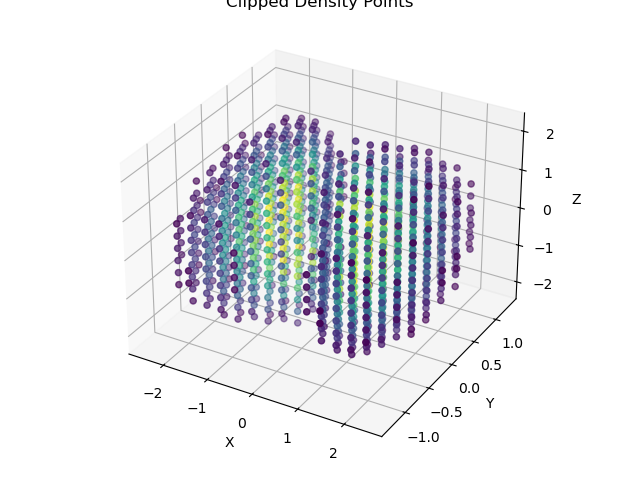

In [217]:

fig, ax = visualisation.plot_clipped_points(
    wavefunction, 
    threshold=0.3,
)

### This looks fine, but we can do a better job by interpolating the wavefunction to a finer grid before plotting.

Interpolating the wavefunction to a finer grid, returns a new `Wavefunction` object with the same properties as the original, but with a finer grid.

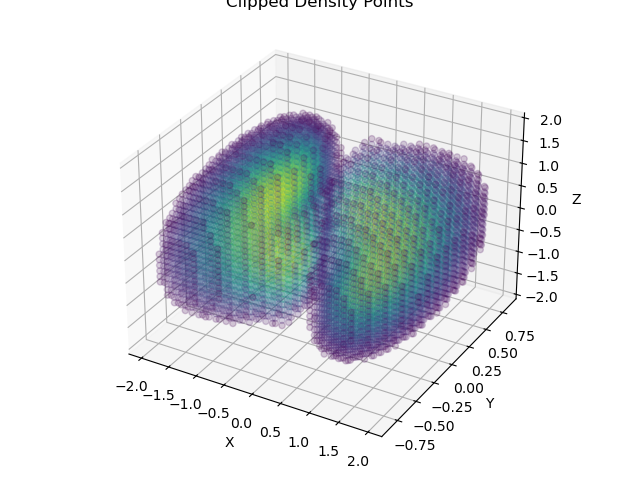

In [ ]:
# it looks fine, but we can do a better job by interpolating the wavefunction to a finer grid before plotting.

# Interpolating the wavefunction to a finer grid, returns a new `Wavefunction` object with the same properties as the original, but with a finer grid.
# The interpolation is so quick as to be effectively free compared to evaluating the wavefunction on the new grid,
# But do be cautious, because relying too heavily on it may lead to inaccuracies in downstream calculations (e.g. energy calculations).
highres_wavefunction = tools.interpolate_grid_function(wavefunction, new_resolution={'x': 50, 'y': 50, 'z': 50})

# Most of the time spent here is actually on visualisation, not on the interpolation.
fig, ax = visualisation.plot_clipped_points(
    highres_wavefunction, 
    threshold=0.5,
    alpha=0.2,  # Make the points semi-transparent at higher density
)

## Visualising the wavefunction with just the isosurface.
We can use the `plot_isosurface` function to plot the isosurface of the wavefunction. This function uses the marching cubes algorithm to extract the isosurface from the wavefunction and then plots it. The isosurface is defined by a threshold value.

(<Figure size 1000x1000 with 1 Axes>, <Axes3D: >)

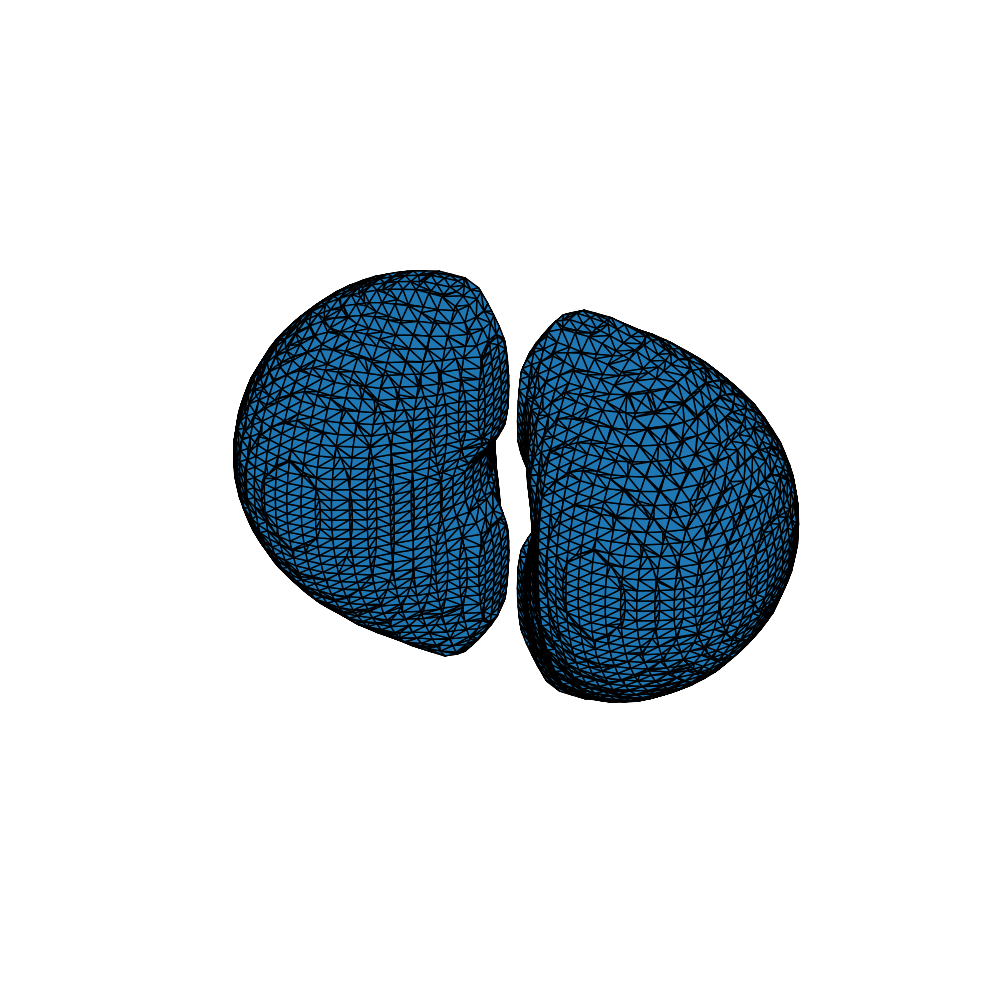

In [223]:
visualisation.plot_isosurface(
    highres_wavefunction, 
    relative_threshold=0.4,
)

## Inspecting the wavefunction data.

Because the underlying calculations rely on attrs and xarray, we can easily inspect the wavefunction data and get nice plotting for free. This is useful for debugging and understanding the wavefunction data. 


In [ ]:
# Xarray offers us a convenient way to access the wavefunction data, inspect the coordinates, resolution etc.

highres_wavefunction.wavefunction

<xarray.DataArray (x: 50, y: 50, z: 50)> Size: 2MB
array([[[-2.85253395e-05+0.j, -3.00812057e-05+0.j, -3.16370720e-05+0.j,
         ..., -3.16370720e-05+0.j, -3.00812057e-05+0.j,
         -2.85253395e-05+0.j],
        [-2.93619312e-05+0.j, -3.09817825e-05+0.j, -3.26016337e-05+0.j,
         ..., -3.26016337e-05+0.j, -3.09817825e-05+0.j,
         -2.93619312e-05+0.j],
        [-3.01985229e-05+0.j, -3.18823592e-05+0.j, -3.35661954e-05+0.j,
         ..., -3.35661954e-05+0.j, -3.18823592e-05+0.j,
         -3.01985229e-05+0.j],
        ...,
        [ 3.01985229e-05+0.j,  3.18823592e-05+0.j,  3.35661954e-05+0.j,
         ...,  3.35661954e-05+0.j,  3.18823592e-05+0.j,
          3.01985229e-05+0.j],
        [ 2.93619312e-05+0.j,  3.09817825e-05+0.j,  3.26016337e-05+0.j,
         ...,  3.26016337e-05+0.j,  3.09817825e-05+0.j,
          2.93619312e-05+0.j],
        [ 2.85253395e-05+0.j,  3.00812057e-05+0.j,  3.16370720e-05+0.j,
         ...,  3.16370720e-05+0.j,  3.00812057e-05+0.j,
          2.85253395e-05+0.j]],

...

       [[-2.85253395e-05+0.j, -3.00812057e-05+0.j, -3.16370720e-05+0.j,
         ..., -3.16370720e-05+0.j, -3.00812057e-05+0.j,
         -2.85253395e-05+0.j],
        [-2.93619312e-05+0.j, -3.09817825e-05+0.j, -3.26016337e-05+0.j,
         ..., -3.26016337e-05+0.j, -3.09817825e-05+0.j,
         -2.93619312e-05+0.j],
        [-3.01985229e-05+0.j, -3.18823592e-05+0.j, -3.35661954e-05+0.j,
         ..., -3.35661954e-05+0.j, -3.18823592e-05+0.j,
         -3.01985229e-05+0.j],
        ...,
        [ 3.01985229e-05+0.j,  3.18823592e-05+0.j,  3.35661954e-05+0.j,
         ...,  3.35661954e-05+0.j,  3.18823592e-05+0.j,
          3.01985229e-05+0.j],
        [ 2.93619312e-05+0.j,  3.09817825e-05+0.j,  3.26016337e-05+0.j,
         ...,  3.26016337e-05+0.j,  3.09817825e-05+0.j,
          2.93619312e-05+0.j],
        [ 2.85253395e-05+0.j,  3.00812057e-05+0.j,  3.16370720e-05+0.j,
         ...,  3.16370720e-05+0.j,  3.00812057e-05+0.j,
          2.85253395e-05+0.j]]])
Coordinates:
  * x        (x) float64 400B -3.0 -2.878 -2.755 -2.633 ... 2.755 2.878 3.0
  * y        (y) float64 400B -3.0 -2.878 -2.755 -2.633 ... 2.755 2.878 3.0
  * z        (z) float64 400B -3.0 -2.878 -2.755 -2.633 ... 2.755 2.878 3.0
Attributes:
    resolution:  {'x': 50, 'y': 50, 'z': 50}
    n:           2
    l:           1
    m:           0

## Plotting other orbitals.

For example, we can plot the 3d orbital for the 4d orbital by specifying the quantum numbers `n=4`, `l=2`, and `m=0` to plot the dz2 orbital.

(<Figure size 1000x1000 with 1 Axes>, <Axes3D: >)

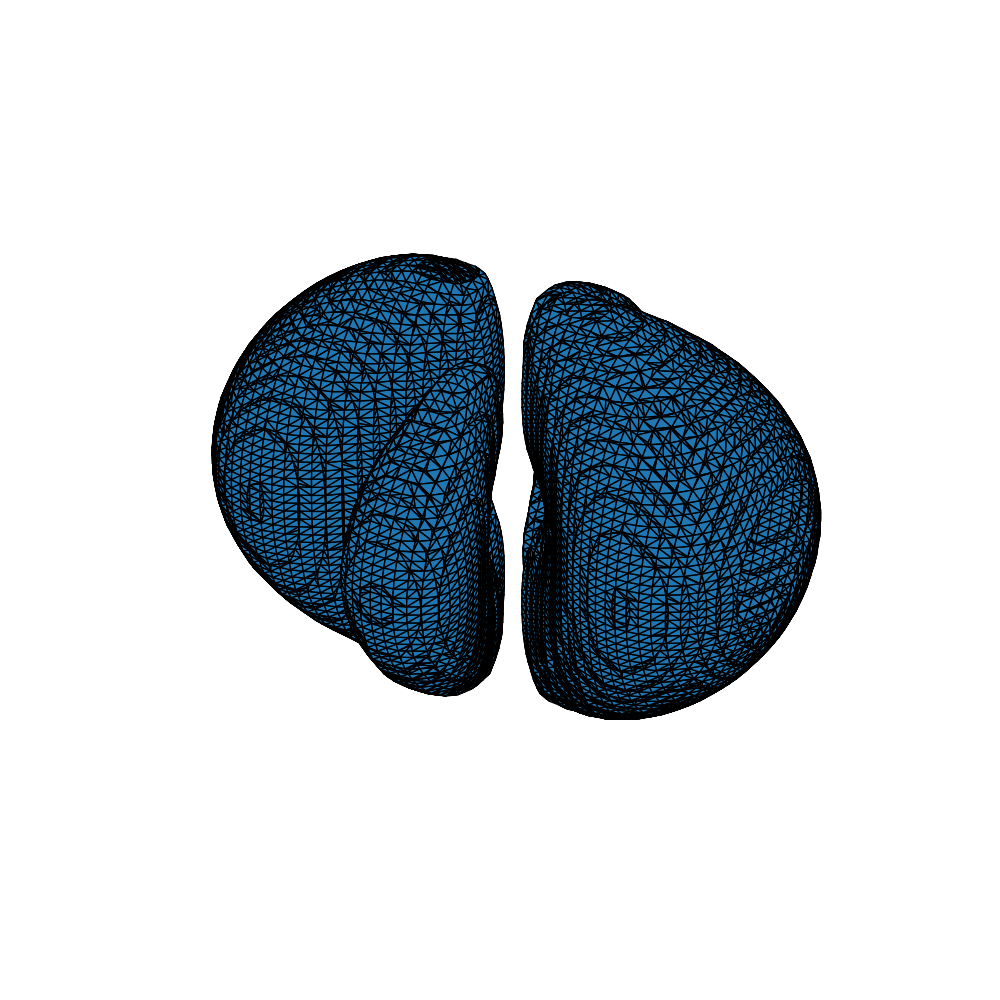

In [235]:
resolution = {"x": 20, "y": 20, "z": 20}
dz2_wavefunction = datatypes.CartesianWavefunction.new_1e_atomic_wavefunction(
    resolution=resolution,
    r_max=5,
    n=4, l=2, m=0
)
dz2_wavefunction.eval_wavefunction()
dz2_highres_wavefunction = tools.interpolate_grid_function(dz2_wavefunction, new_resolution={'x': 50, 'y': 50, 'z': 50})
visualisation.plot_isosurface(
    dz2_highres_wavefunction, 
    relative_threshold=0.1,
)
